<a href="https://colab.research.google.com/github/mukul9155/Airbnb-data-analysis/blob/main/Mukul_Kumar_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline

In [ ]:
path ="/Airbnb NYC 2019.csv" 

In [ ]:
df = pd.read_csv(path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
df.shape

(48895, 16)

In [ ]:
list(df.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
df = pd.DataFrame(df)

**Data cleaning**

In [ ]:
df.drop(['id','name','host_id','last_review','reviews_per_month'],axis=1, inplace=True)

I have removed the data which is not taken into consideration during analysis of data. 

In [ ]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
df.count()

host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

**Analysis of EDA**

1. Which neighbourhood group has most number of hosts?

In [ ]:
neighbourhood_group_count= df.groupby(['neighbourhood_group'])['host_name'].count().reset_index()
host_name = neighbourhood_group_count.sort_values(by='host_name',ascending=False)
host_name

,neighbourhood_group,host_name
2,Manhattan,21652
1,Brooklyn,20095
3,Queens,5664
0,Bronx,1090
4,Staten Island,373


Text(0, 0.5, 'host_name')

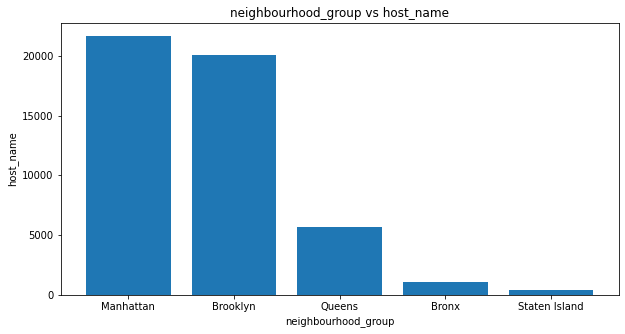

In [ ]:
neighbourhood_group_new = host_name['neighbourhood_group']
host_most = host_name['host_name']
fig = plt.figure(figsize = (10,5))
plt.bar(neighbourhood_group_new,host_most)
plt.title('neighbourhood_group vs host_name')
plt.xlabel('neighbourhood_group')
plt.ylabel('host_name')


This bar chart shows that the neighbourhood group "Manhattan" has highest number of hosts. 

2. What can be learn about different hosts and areas?

In [ ]:
host_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
host_listings_count = host_areas.sort_values(by='calculated_host_listings_count',ascending=False).head(10)
host_listings_count

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
432,Alex,Manhattan,134
9856,Mike,Manhattan,134


3. What can be learn from predictions about locations, prices and reviews?

In [ ]:
areas_reviews = df.groupby(['neighbourhood_group','price','minimum_nights'])['number_of_reviews'].count().reset_index()
price_reviews = areas_reviews.sort_values(by='price',ascending=False).head(10)
price_reviews

,neighbourhood_group,price,minimum_nights,number_of_reviews
6223,Manhattan,10000,30,1
7312,Queens,10000,100,1
2900,Brooklyn,10000,5,1
6222,Manhattan,9999,99,1
6221,Manhattan,9999,30,1
6220,Manhattan,9999,5,1
6219,Manhattan,8500,30,1
2899,Brooklyn,8000,1,1
6218,Manhattan,7703,1,1
6217,Manhattan,7500,1,1


Text(0, 0.5, 'price')

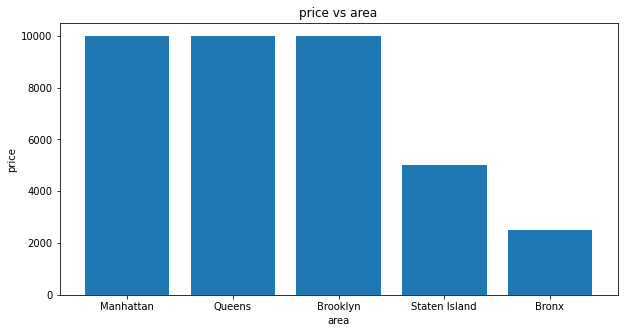

In [ ]:
area = price_reviews['neighbourhood_group']
price = price_reviews['price']
fig = plt.figure(figsize = (10,5))
plt.bar(area,price)
plt.title('price vs area')
plt.xlabel('area')
plt.ylabel('price')


In [ ]:
list(df['neighbourhood_group'].value_counts()[0:5].keys())


['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

In [ ]:
list(df['number_of_reviews'].value_counts()[0:5])


[10052, 5244, 3465, 2520, 1994]

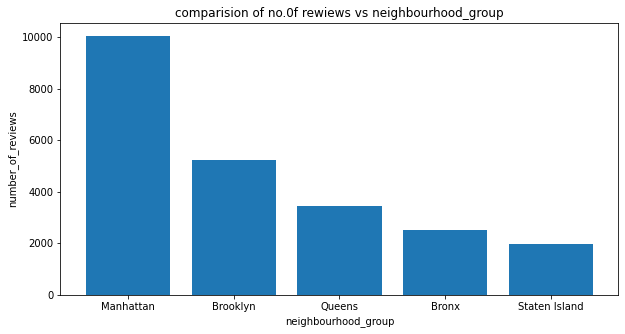

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(list(df['neighbourhood_group'].value_counts()[0:5].keys()),list(df['number_of_reviews'].value_counts()[0:5]))
plt.title('comparision of no.0f rewiews vs neighbourhood_group')
plt.xlabel('neighbourhood_group')
plt.ylabel('number_of_reviews')
plt.show()


This graph shows that manhattan neighbourhood group has highest number of reviews.
but here not able to find the ratings of that group and also the positive or negative feedback of the groups.

**comparision of neighbourhood groups with respect to price **

Text(0, 0.5, 'price')

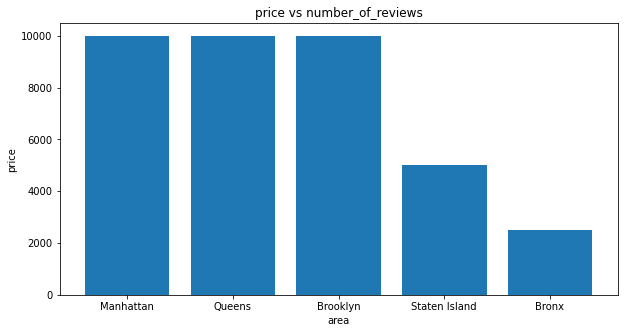

In [ ]:
area = price_reviews['neighbourhood_group']
price_reviews = price_reviews['price']
fig = plt.figure(figsize = (10,5))
plt.bar(area, price_reviews)
plt.title('price vs number_of_reviews')
plt.xlabel('area')
plt.ylabel('price')


4. What can be concluded about the locations of the neighbourhood groups on the basis of longitude and latitude?

In [ ]:
range_longitude = df['longitude'].max()-df['longitude'].min()
range_longitude

0.5314300000000003

In [ ]:
range_latitude = df['latitude'].max()-df['latitude'].min()
range_latitude

0.41327000000000425

It is seen that there is less variations of latitudes and longitudes among the neighbourhood groups where groups are located.
so it can be concluded that there is dense population there.

5. Which hosts are busiest and why?

In [ ]:
busiest_hosts = df.groupby(['host_name','neighbourhood_group','price','room_type'])['minimum_nights'].count().reset_index()
busiest_hosts= busiest_hosts.sort_values(by='minimum_nights',ascending=False).head(10)
busiest_hosts

,host_name,neighbourhood_group,price,room_type,minimum_nights
20939,Kara,Manhattan,239,Entire home/apt,48
12897,Eyal,Manhattan,60,Private room,31
41351,Zach,Brooklyn,48,Private room,25
30287,Nina,Brooklyn,42,Private room,25
39990,Vida,Brooklyn,129,Entire home/apt,20
37086,Stanley,Manhattan,150,Entire home/apt,19
36744,Sonder (NYC),Manhattan,229,Entire home/apt,17
38476,The Box House Hotel,Brooklyn,199,Entire home/apt,17
8559,Corporate Housing,Manhattan,125,Entire home/apt,17
39991,Vida,Brooklyn,149,Entire home/apt,15


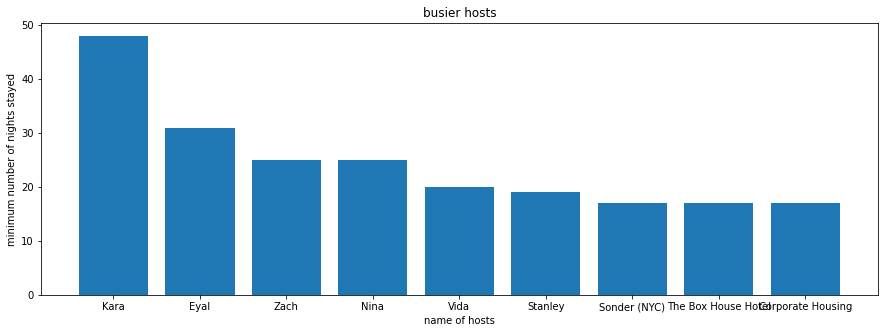

In [ ]:
name = busiest_hosts['host_name']
stayed = busiest_hosts['minimum_nights']
fig = plt.figure(figsize = (15,5))
plt.bar(name, stayed)
plt.title('busier hosts')
plt.xlabel('name of hosts')
plt.ylabel('minimum number of nights stayed')
plt.show()


The host name 'Kara' is the most busiest host. the reason may be excellent customer ratings, good hospitality, proper location etc.

6. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [ ]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas= traffic_areas.sort_values(by='minimum_nights',ascending=False).head(10)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


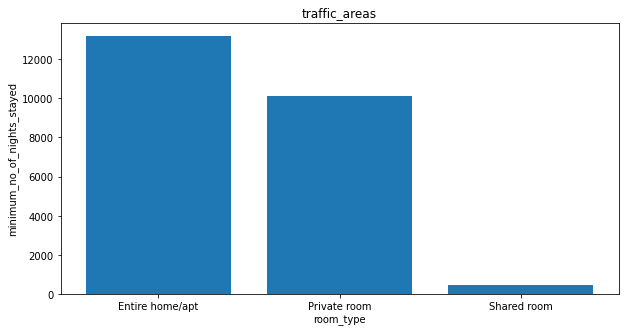

In [ ]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']
fig = plt.figure(figsize = (10,5))
plt.bar(room_type, stayed)
plt.title('traffic_areas')
plt.xlabel('room_type')
plt.ylabel('minimum_no_of_nights_stayed')
plt.show()

Most of the people are prefering to stay either in entire room or in private rooms and very few are staying in shared rooms.
That can be concluded that couples are mostly coming to stay or may be a family also. 
The most prefered neighbourhood groups are "Manhattan" and "Brooklyn".

7. Which host is available most of the time?

In [ ]:
list(df['host_name'].value_counts()[0:10].keys())

['Michael',
 'David',
 'Sonder (NYC)',
 'John',
 'Alex',
 'Blueground',
 'Sarah',
 'Daniel',
 'Jessica',
 'Maria']

In [ ]:
list(df['availability_365'].value_counts()[0:10])

[17533, 1295, 491, 408, 361, 340, 306, 301, 290, 270]

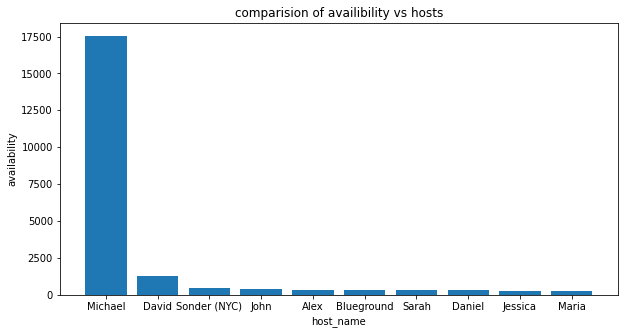

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(list(df['host_name'].value_counts()[0:10].keys()),list(df['availability_365'].value_counts()[0:10]))
plt.title('comparision of availibility vs hosts')
plt.xlabel('host_name')
plt.ylabel('availability')
plt.show()

Among the hosts the host name 'Michael' is being available for most of the time.
but it can not be identified the number of availability per year because data is not sufficient for this calculation.